# <font color = 'tomato'>Sundarbans Satellite Imagery Analysis using Python</font>

#Import Modules

In [ ]:
!pip install earthpy gdal

In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
%cd /content/drive/My Drive/Satellite_data


[WinError 3] Das System kann den angegebenen Pfad nicht finden: '/content/drive/My Drive/Satellite_data'
C:\Users\fgrassxx\PycharmProjects\pds_gyrocopter


## Sentine 2 Band Details

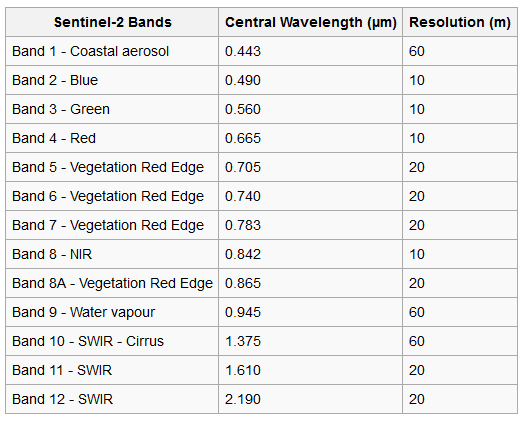

# DataSet

## Sundarbans Satellite Data

In [2]:
S_sentinel_bands = glob("C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 'C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 'C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 'C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 'C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 'C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 'C:/Users/fgrassxx/Desktop/Satellite_Imagery_Analysis-main/Data/sundarbans_data\\2020-01-27-00_00_2020-01-27-23

In [3]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))


In [4]:
arr_st = np.stack(l)

In [5]:
arr_st.shape

(12, 954, 298)

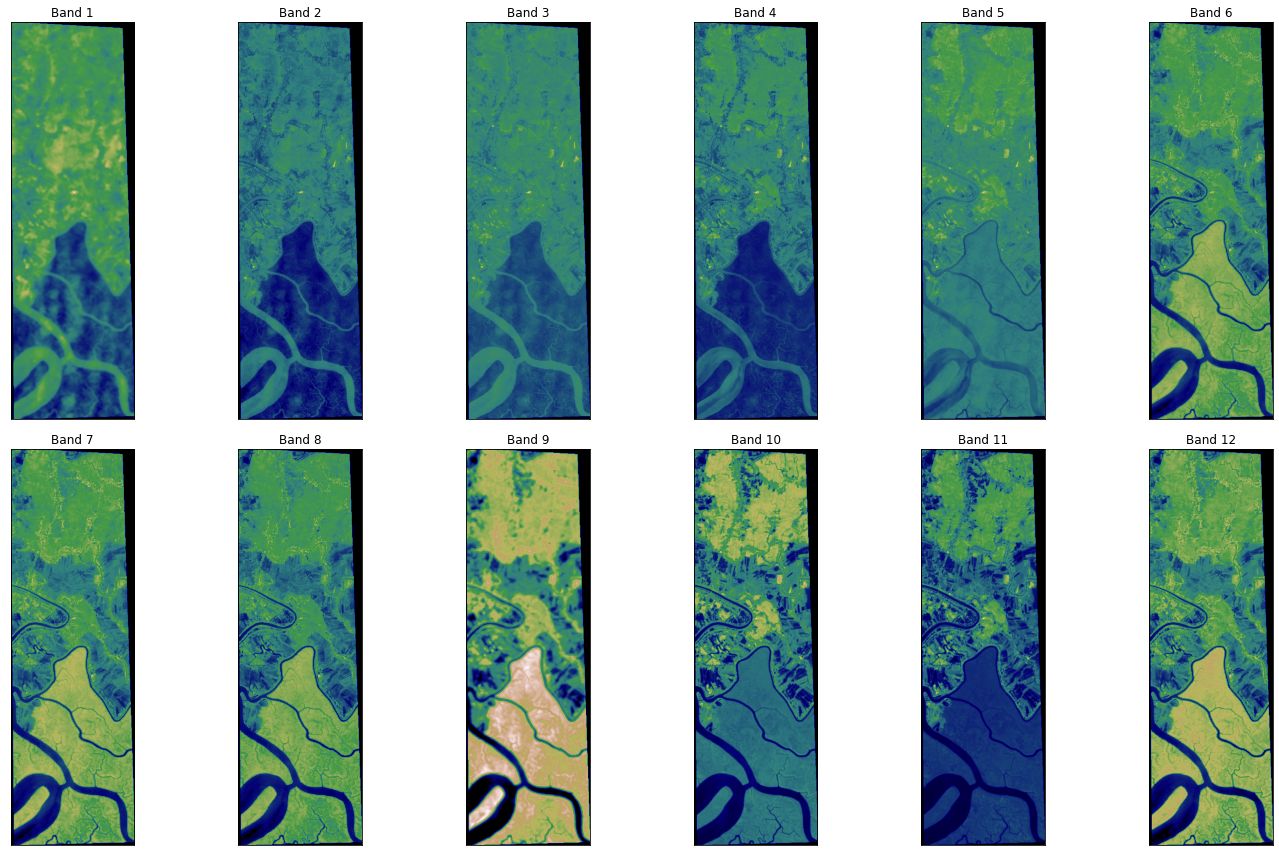

In [6]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

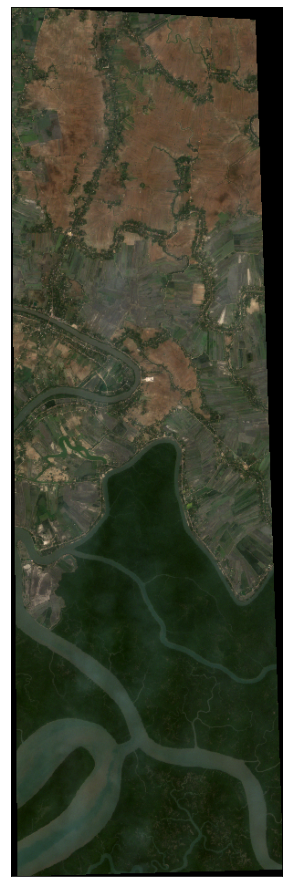

In [8]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

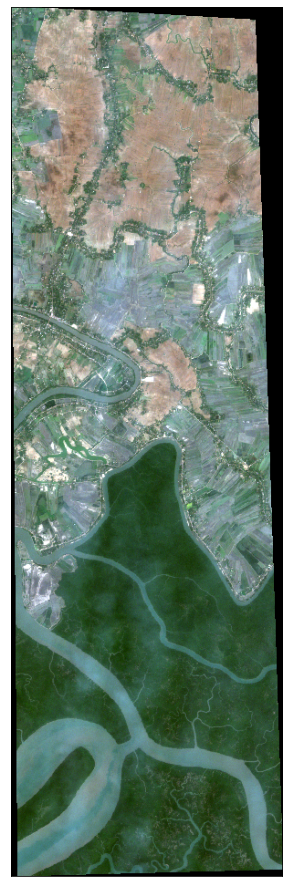

In [9]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

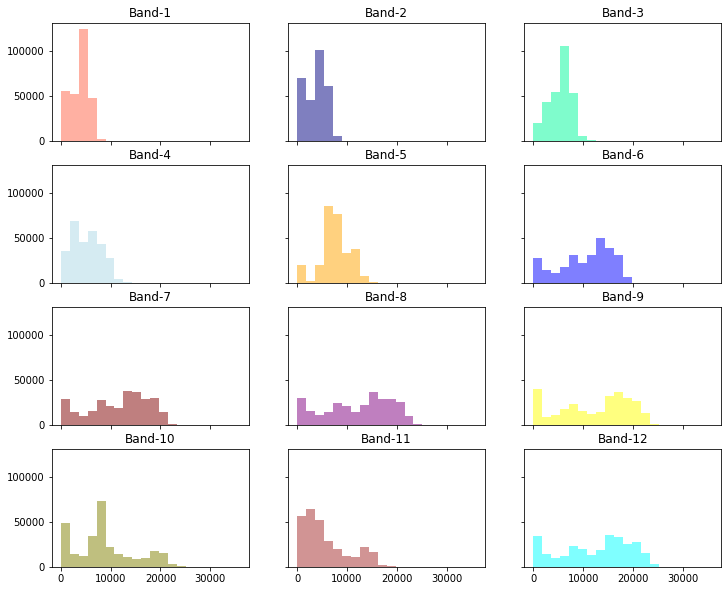

In [10]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

# Vegetation and soils indices

## Normalized Difference Vegetation Index (NDVI)
```
NDVI = ((NIR - Red)/(NIR + Red))
```

* NIR = pixel values from the near-infrared band
* Red = pixel values from the red band

/usr/local/lib/python3.6/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


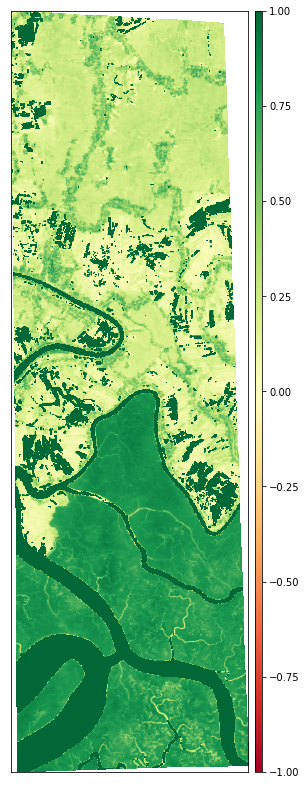

In [ ]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Soil-Adjusted Vegetation Index (SAVI) 

```
SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
```
* NIR = pixel values from the near infrared band
* Red = pixel values from the near red band
* L = amount of green vegetation cover

In [ ]:
L = 0.5

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

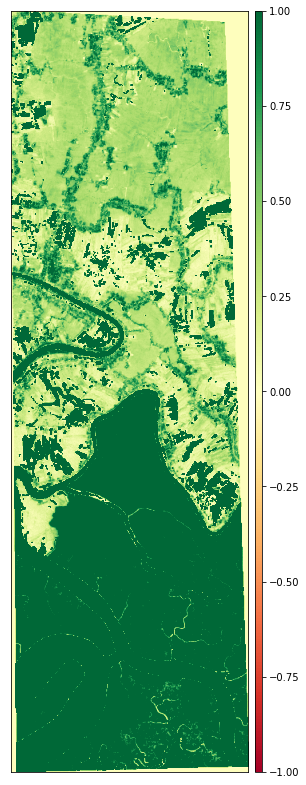

In [ ]:
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Visible Atmospherically Resistant Index (VARI)
```
VARI = (Green - Red)/ (Green + Red - Blue)
```
* Green = pixel values from the green band
* Red= pixel values from the red band
* Blue = pixel values from the blue band

In [ ]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

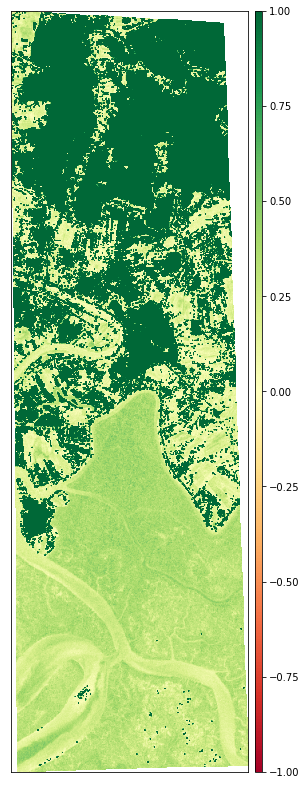

In [ ]:
ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Distribution of NDVI, SAVI, and VARI pixel values

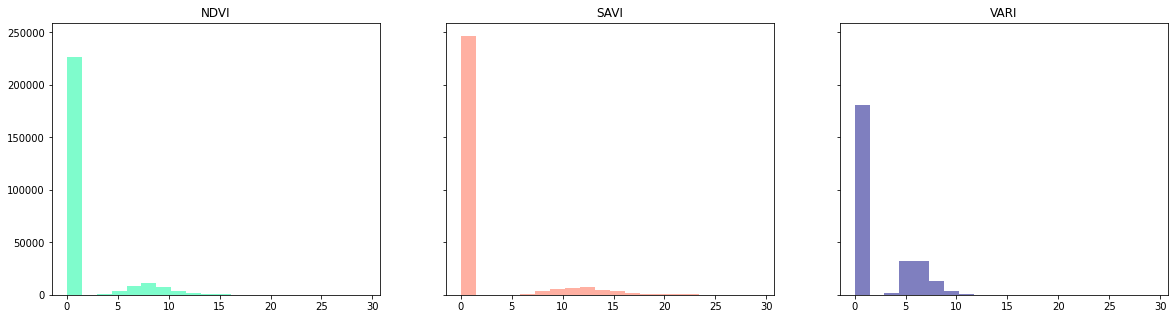

In [ ]:
ep.hist(np.stack([ndvi, savi, vari]), 
        alpha=0.5,
        cols=3, 
        figsize=(20, 5),
        title = ['NDVI', 'SAVI', 'VARI'],
        colors = ['mediumspringgreen', 'tomato', 'navy'])
plt.show()

# Water Indices

## Modified Normalized Difference Water Index (MNDWI) 

```
MNDWI = (Green - SWIR) / (Green + SWIR)
```
* Green = pixel values from the green band
* SWIR = pixel values from the short-wave infrared band

In [ ]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

/usr/local/lib/python3.6/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


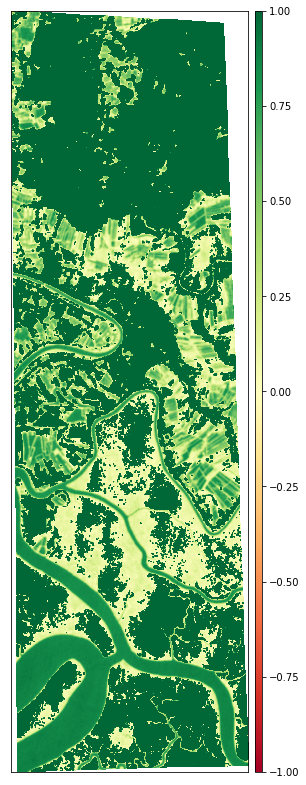

In [ ]:
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Normalized Difference Moisture Index (NDMI) 

```
NDMI = (NIR - SWIR1)/(NIR + SWIR1)
```
* NIR = pixel values from the near infrared band
* SWIR1 = pixel values from the short-wave infrared 1 band

In [ ]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

/usr/local/lib/python3.6/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


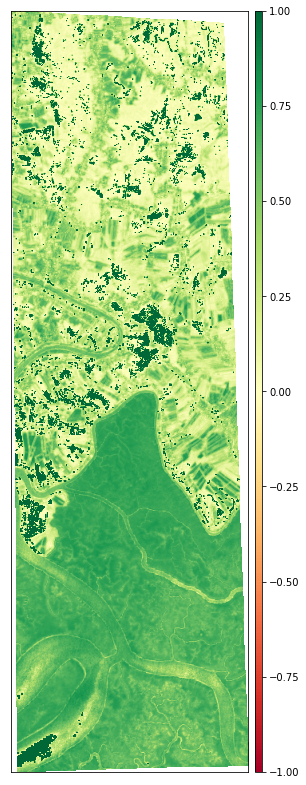

In [ ]:
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

# Geology Indices

## Clay Minerals
```
Clay Minerals Ratio = SWIR1 / SWIR2
```
* SWIR1 = pixel values from the short-wave infrared 1 band
* SWIR2 = pixel values from the short-wave infrared 2 band

In [ ]:
cmr = np.divide(arr_st[10], arr_st[11])

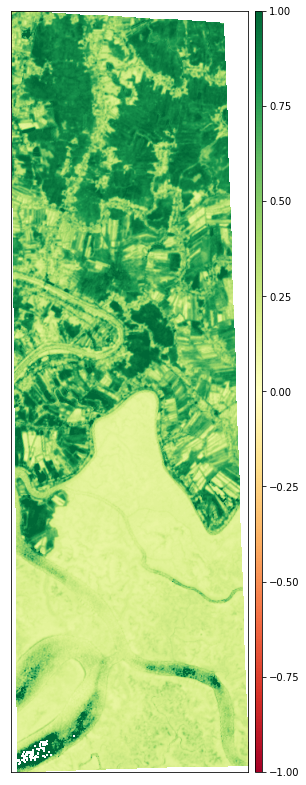

In [ ]:
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

## Ferrous Minerals

```
Ferrous Minerals Ratio = SWIR / NIR
```

* SWIR= pixel values from the short-wave infrared band
* NIR = pixel values from the near infrared band

In [ ]:
fmr = np.divide(arr_st[10], arr_st[7])

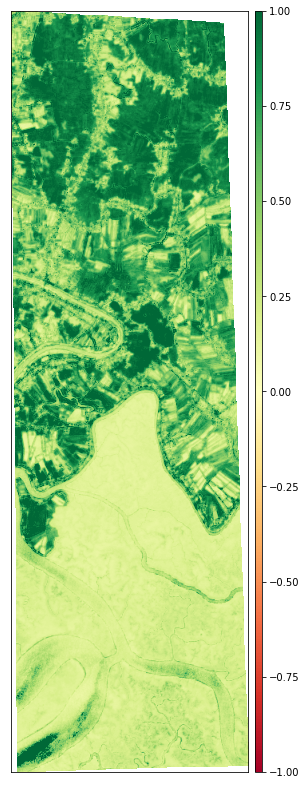

In [ ]:
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()